In [1]:
import pandas as pd

In [2]:
arima_res = pd.read_csv("arima_results.csv")

In [3]:
lstm_res = pd.read_csv("lstm_results.csv")

In [4]:
cnn_res = pd.read_csv("cnn_results.csv")

In [5]:
cnn_lstm_res = pd.read_csv("cnn_lstm_results.csv")

In [6]:
res = pd.concat([arima_res, lstm_res, cnn_res, cnn_lstm_res])

In [7]:
grp = res[res["TYPE"] == "MAPE"].groupby(["ALGORITHM", "COMPANY"]).mean()
grp.rename(columns={"ERROR": "MEAN"}, inplace=True)
grp["STD"] = res[res["TYPE"] == "MAPE"].groupby(["ALGORITHM", "COMPANY"]).std()["ERROR"]
grp["STD_MAX"] = grp["MEAN"] + grp["STD"]
grp["STD_MIN"] = grp["MEAN"] - grp["STD"]
grp.reset_index(inplace=True)
grp

,ALGORITHM,COMPANY,MEAN,STD,STD_MAX,STD_MIN
0,ARIMA,AAPL,0.008992,0.002414,0.011406,0.006577
1,ARIMA,AMZN,0.010060,0.002780,0.012839,0.007280
2,ARIMA,FB,0.010063,0.002811,0.012874,0.007252
3,ARIMA,GOOG,0.008343,0.002235,0.010578,0.006108
4,ARIMA,MSFT,0.007961,0.002303,0.010264,0.005657
5,CNN,AAPL,0.018852,0.007698,0.026550,0.011154
6,CNN,AMZN,0.034009,0.015365,0.049374,0.018644
7,CNN,FB,0.029111,0.008984,0.038095,0.020127
8,CNN,GOOG,0.018339,0.009904,0.028242,0.008435
9,CNN,MSFT,0.019422,0.005411,0.024833,0.014012


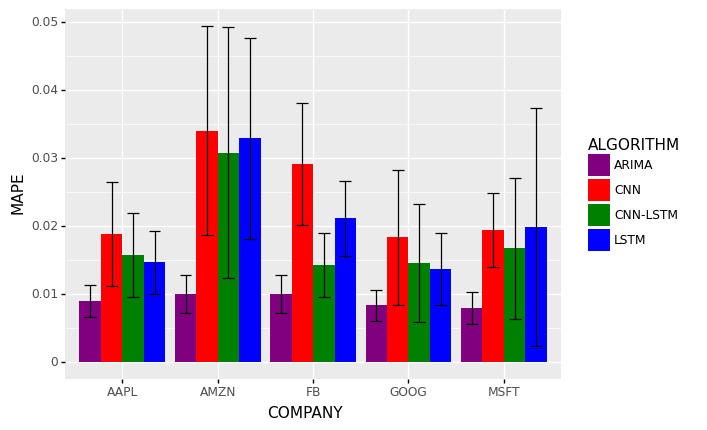

D:\Anaconda\envs\su\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
D:\Anaconda\envs\su\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: models/fig1.png


In [8]:
from plotnine import *

grpcol = ["purple", "red", "green", "blue"]

grp.rename(columns={"MEAN": "MAPE"}, inplace=True)
g = (
    ggplot(grp, aes(x="COMPANY", y="MAPE", fill="ALGORITHM")) +
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin="STD_MIN", ymax="STD_MAX"), position=position_dodge(0.9)) +
    scale_fill_manual(values=grpcol)
)
print(g)
ggsave(plot=g, filename='models/fig1.png', dpi=80)

In [9]:
outt = grp.groupby("ALGORITHM").mean()
outt = outt.reset_index()
outt.rename(columns={"STD": "SDAPE"}, inplace=True)
outt = outt[["ALGORITHM", "MAPE", "SDAPE"]]
outt = outt.round(3)
outt

,ALGORITHM,MAPE,SDAPE
0,ARIMA,0.009,0.003
1,CNN,0.024,0.009
2,CNN-LSTM,0.018,0.010
3,LSTM,0.020,0.010


In [10]:
grp = res[res["TYPE"] == "RMSE"].groupby(["ALGORITHM", "COMPANY"]).mean()
grp.rename(columns={"ERROR": "RMSE"}, inplace=True)
grp["STD"] = res[res["TYPE"] == "RMSE"].groupby(["ALGORITHM", "COMPANY"]).std()["ERROR"]
grp["STD_MAX"] = grp["RMSE"] + grp["STD"]
grp["STD_MIN"] = grp["RMSE"] - grp["STD"]
grp.reset_index(inplace=True)
grp

,ALGORITHM,COMPANY,RMSE,STD,STD_MAX,STD_MIN
0,ARIMA,AAPL,0.642592,0.366267,1.008859,0.276325
1,ARIMA,AMZN,22.110443,12.607098,34.717541,9.503344
2,ARIMA,FB,2.587796,0.999580,3.587376,1.588216
3,ARIMA,GOOG,13.519255,5.530287,19.049543,7.988968
4,ARIMA,MSFT,1.259657,0.832960,2.092616,0.426697
5,CNN,AAPL,1.060017,0.530971,1.590987,0.529046
6,CNN,AMZN,52.720712,24.772149,77.492861,27.948563
7,CNN,FB,5.672436,1.779762,7.452198,3.892674
8,CNN,GOOG,24.277380,14.063829,38.341209,10.213551
9,CNN,MSFT,2.555712,2.048179,4.603891,0.507533


In [11]:
outt2 = grp.groupby("ALGORITHM").mean()
outt2 = outt2.reset_index()
outt2.rename(columns={"STD": "SDMSE"}, inplace=True)
outt2 = outt2[["ALGORITHM", "RMSE", "SDMSE"]]
outt["RMSE"] = outt2["RMSE"].round(2)
outt["SDMSE"] = outt2["SDMSE"].round(2)
outt.to_latex("res1.tex", index=False)
outt

,ALGORITHM,MAPE,SDAPE,RMSE,SDMSE
0,ARIMA,0.009,0.003,8.02,4.07
1,CNN,0.024,0.009,17.26,8.64
2,CNN-LSTM,0.018,0.010,13.96,8.45
3,LSTM,0.020,0.010,16.12,8.96


In [12]:
lstm_res[(cnn_res["COMPANY"] == "AAPL") & (cnn_res["TYPE"] == "RMSE")]

,ALGORITHM,START,END,TYPE,COMPANY,ERROR
0,LSTM,2010-06-01,2015-06-01,RMSE,AAPL,0.589854
2,LSTM,2011-01-01,2016-01-01,RMSE,AAPL,0.354320
4,LSTM,2011-06-01,2016-06-01,RMSE,AAPL,0.441114
6,LSTM,2012-01-01,2017-01-01,RMSE,AAPL,0.473710
8,LSTM,2012-06-01,2017-06-01,RMSE,AAPL,0.864325
10,LSTM,2013-01-01,2018-01-01,RMSE,AAPL,1.394233
12,LSTM,2013-06-01,2018-06-01,RMSE,AAPL,1.322082
14,LSTM,2014-01-01,2019-01-01,RMSE,AAPL,0.979928
16,LSTM,2014-06-01,2019-06-01,RMSE,AAPL,1.500909


In [13]:
arima_res[(arima_res["COMPANY"] == "AMZN") & (arima_res["TYPE"] == "RMSE")]

,ALGORITHM,START,END,TYPE,COMPANY,ERROR
18,ARIMA,2010-06-01,2015-06-01,RMSE,AMZN,11.405404
20,ARIMA,2011-01-01,2016-01-01,RMSE,AMZN,9.185248
22,ARIMA,2011-06-01,2016-06-01,RMSE,AMZN,9.121675
24,ARIMA,2012-01-01,2017-01-01,RMSE,AMZN,12.413973
26,ARIMA,2012-06-01,2017-06-01,RMSE,AMZN,23.483315
28,ARIMA,2013-01-01,2018-01-01,RMSE,AMZN,37.089340
30,ARIMA,2013-06-01,2018-06-01,RMSE,AMZN,36.441232
32,ARIMA,2014-01-01,2019-01-01,RMSE,AMZN,20.618149
34,ARIMA,2014-06-01,2019-06-01,RMSE,AMZN,39.235648


In [14]:
tms1 = pd.read_csv("./data/AAPL_residuals.csv")["Open"][60:]
tms2 = pd.read_csv("./data/AMZN_residuals.csv")["Open"][60:]
tms3 = pd.read_csv("./data/FB_residuals.csv")["Open"][60:]
tms4 = pd.read_csv("./data/GOOG_residuals.csv")["Open"][60:]
tms5 = pd.read_csv("./data/MSFT_residuals.csv")["Open"][60:]

## Residuals

In [15]:
from statsmodels.tsa.stattools import adfuller
for tms in [tms1,tms2,tms3,tms4,tms5]:
    result = adfuller(tms)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


ADF Statistic: -10.913555
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -12.534215
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -46.815927
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -11.268106
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -13.725297
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [16]:
lstm_res = pd.read_csv("./models/lstm_rez_results.csv")
cnn_res = pd.read_csv("./models/cnn_rez_results.csv")
cnn_lstm_res = pd.read_csv("./models/cnn_lstm_rez_results.csv")
res = pd.concat([arima_res, lstm_res, cnn_res, cnn_lstm_res])
res

,ALGORITHM,START,END,TYPE,COMPANY,ERROR
0,ARIMA,2010-06-01,2015-06-01,RMSE,AAPL,0.481616
1,ARIMA,2010-06-01,2015-06-01,MAPE,AAPL,0.011169
2,ARIMA,2011-01-01,2016-01-01,RMSE,AAPL,0.326999
3,ARIMA,2011-01-01,2016-01-01,MAPE,AAPL,0.007181
4,ARIMA,2011-06-01,2016-06-01,RMSE,AAPL,0.303102
...,...,...,...,...,...,...
85,CNN-LSTM,2013-06-01,2018-06-01,MAPE,MSFT,1.376633
86,CNN-LSTM,2014-01-01,2019-01-01,RMSE,MSFT,1.296789
87,CNN-LSTM,2014-01-01,2019-01-01,MAPE,MSFT,3.043468
88,CNN-LSTM,2014-06-01,2019-06-01,RMSE,MSFT,2.922341


In [17]:
grp = res[res["TYPE"] == "RMSE"].groupby(["ALGORITHM", "COMPANY"]).mean()
grp.rename(columns={"ERROR": "RMSE"}, inplace=True)
grp["STD"] = res[res["TYPE"] == "RMSE"].groupby(["ALGORITHM", "COMPANY"]).std()["ERROR"]
#grp["STD_MAX"] = grp["RMSE"] + grp["STD"]
#grp["STD_MIN"] = grp["RMSE"] - grp["STD"]
grp.reset_index(inplace=True)
grp = grp[["COMPANY", "ALGORITHM", "RMSE"]]
outt3 = grp.pivot(index="ALGORITHM", columns="COMPANY").round(10)
outt3["Mean"] = outt3.mean(axis=1)
outt3.to_latex("res2.tex")
outt3

RMSE                                                Mean
COMPANY        AAPL       AMZN        FB       GOOG      MSFT          
ALGORITHM                                                              
ARIMA      0.642592  22.110443  2.587796  13.519255  1.259657  8.023949
CNN        0.574236  20.273350  2.535432  11.928661  1.112125  7.284761
CNN-LSTM   0.574244  20.413176  2.625987  12.513533  1.125688  7.450526
LSTM       0.653575  24.480369  2.918704  14.472943  1.302035  8.765525

In [18]:
grp = res[res["TYPE"] == "RMSE"].groupby(["ALGORITHM", "COMPANY"]).mean()
grp.rename(columns={"ERROR": "RMSE"}, inplace=True)
grp["STD"] = res[res["TYPE"] == "RMSE"].groupby(["ALGORITHM", "COMPANY"]).std()["ERROR"]
grp["STD_MAX"] = grp["RMSE"] + grp["STD"]
grp["STD_MIN"] = grp["RMSE"] - grp["STD"]
grp.reset_index(inplace=True)
#grp = grp[["COMPANY", "ALGORITHM", "RMSE"]]
grp = grp.set_index("ALGORITHM")
grp

,COMPANY,RMSE,STD,STD_MAX,STD_MIN
ALGORITHM,,,,,
ARIMA,AAPL,0.642592,0.366267,1.008859,0.276325
ARIMA,AMZN,22.110443,12.607098,34.717541,9.503344
ARIMA,FB,2.587796,0.999580,3.587376,1.588216
ARIMA,GOOG,13.519255,5.530287,19.049543,7.988968
ARIMA,MSFT,1.259657,0.832960,2.092616,0.426697
CNN,AAPL,0.574236,0.357491,0.931727,0.216746
CNN,AMZN,20.273350,11.014702,31.288052,9.258648
CNN,FB,2.535432,1.134188,3.669620,1.401244
CNN,GOOG,11.928661,5.142227,17.070888,6.786435


In [19]:
grp["dRMSE"] = list(grp.loc["ARIMA", "RMSE"]) * 4 - grp["RMSE"]

In [20]:
import numpy as np
grp["rRMSE"] = grp["dRMSE"] / np.array(list(grp.loc["ARIMA", "STD"]) * 4)
grp["rSTD"] = grp["dRMSE"] / np.array(list(grp.loc["ARIMA", "STD"]) * 4)
grp = grp.reset_index()
#grp = grp[grp["ALGORITHM"] != "ARIMA"]

In [21]:
grp

,ALGORITHM,COMPANY,RMSE,STD,STD_MAX,STD_MIN,dRMSE,rRMSE,rSTD
0,ARIMA,AAPL,0.642592,0.366267,1.008859,0.276325,0.000000,0.000000,0.000000
1,ARIMA,AMZN,22.110443,12.607098,34.717541,9.503344,0.000000,0.000000,0.000000
2,ARIMA,FB,2.587796,0.999580,3.587376,1.588216,0.000000,0.000000,0.000000
3,ARIMA,GOOG,13.519255,5.530287,19.049543,7.988968,0.000000,0.000000,0.000000
4,ARIMA,MSFT,1.259657,0.832960,2.092616,0.426697,0.000000,0.000000,0.000000
5,CNN,AAPL,0.574236,0.357491,0.931727,0.216746,0.068356,0.186629,0.186629
6,CNN,AMZN,20.273350,11.014702,31.288052,9.258648,1.837093,0.145719,0.145719
7,CNN,FB,2.535432,1.134188,3.669620,1.401244,0.052364,0.052386,0.052386
8,CNN,GOOG,11.928661,5.142227,17.070888,6.786435,1.590594,0.287615,0.287615
9,CNN,MSFT,1.112125,0.785898,1.898023,0.326227,0.147532,0.177118,0.177118


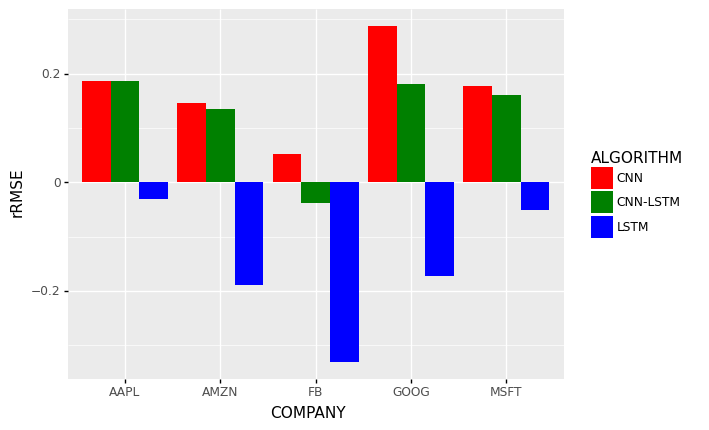

D:\Anaconda\envs\su\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
D:\Anaconda\envs\su\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: models/fig2.png


In [22]:
from plotnine import *

grpcol = ["red", "green", "blue"]

#grp.rename(columns={"MEAN": "MAPE"}, inplace=True)
g = (
    ggplot(grp[grp["ALGORITHM"] != "ARIMA"], aes(x="COMPANY", y="rRMSE", fill="ALGORITHM")) +
    geom_bar(stat="identity", position=position_dodge()) +
    #geom_errorbar(aes(ymin="STD_MIN", ymax="STD_MAX"), position=position_dodge(0.9))
    scale_fill_manual(values=grpcol)
)
print(g)
ggsave(plot=g, filename='models/fig2.png', dpi=80)

## Explainability

In [23]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [24]:
!dir

 Volume in drive E is New Volume
 Volume Serial Number is 64E0-7FA7

 Directory of E:\Documents\FRI\predmeti\letnik_01\zimni semester\Strojno ucenje\seminarska naloga

01-Jan-22  12:13    <DIR>          .
01-Jan-22  12:13    <DIR>          ..
28-Nov-21  11:11                16 .gitignore
31-Dec-21  16:29    <DIR>          .ipynb_checkpoints
28-Dec-21  11:13             5,289 arima_results.csv
28-Dec-21  15:22    <DIR>          articles
28-Dec-21  12:11             5,556 cnn_lstm_results.csv
28-Dec-21  12:11             5,090 cnn_results.csv
28-Dec-21  16:02    <DIR>          data
28-Nov-21  11:10    <DIR>          docs
30-Dec-21  12:06             7,692 environment.yml
29-Dec-21  10:09    <DIR>          images
27-Nov-21  19:18    <DIR>          instructions
28-Dec-21  12:11             5,191 lstm_results.csv
01-Jan-22  12:06    <DIR>          models
28-Nov-21  20:46    <DIR>          prepreparation
28-Dec-21  13:23    <DIR>          preprocessing
28-Nov-21  11:29             1,459 READ

In [25]:
%cd models

E:\Documents\FRI\predmeti\letnik_01\zimni semester\Strojno učenje\seminarska naloga\models


### CNN

In [26]:
from a2d_cnn import cnn_build

WINDOW_SIZE = 18
model = cnn_build(WINDOW_SIZE)
model.load_weights('checkpoint/2d_cnn_AAPL_checkpoint/')

import numpy as np
import visualization.view_time_series as vts
from sklearn.preprocessing import StandardScaler
stk_train = vts.stock_get("AAPL", "2014-06-01", "2019-06-01")
stk_test = vts.stock_get("AAPL", "2019-06-01", "2020-06-01")

apple_train = stk_train.iloc[:,1:7].values
num_instances, num_features = stk_train.shape
apple_test = stk_test.iloc[:, 1:7].values

feature_set = []
labels = []
test_feature_set = []
test_labels = []

scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(-1,1))

apple_train_scaled = scaler.fit_transform(apple_train)
print(apple_train_scaled)
apple_test_scaled = scaler.transform(apple_test)

for i in range(WINDOW_SIZE, apple_train_scaled.shape[0]):
    feature_set.append(apple_train_scaled[i-WINDOW_SIZE:i, :])
    labels.append(apple_train_scaled[i,0])
for i in range(WINDOW_SIZE, apple_test_scaled.shape[0]):
    test_feature_set.append(apple_test_scaled[i-WINDOW_SIZE:i, :])
    test_labels.append(apple_test_scaled[i,0])

feature_set, labels = np.array(feature_set), np.array(labels)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], feature_set.shape[2], 1))
    
test_feature_set, test_labels = np.array(test_feature_set), np.array(test_labels)
test_feature_set = np.reshape(test_feature_set, (test_feature_set.shape[0], \
                                                            test_feature_set.shape[1], feature_set.shape[2], 1))

[[-1.34890897 -1.36607669 -1.37261057 -1.37000566 -1.3708118   2.73672922]
 [-1.37052603 -1.35085569 -1.34980429 -1.33508491 -1.34028154  1.75135469]
 [-1.33523145 -1.31523597 -1.31862912 -1.3064883  -1.31528112  2.30128094]
 ...
 [ 1.01314975  1.04991171  1.04485633  1.03796236  1.12273794 -0.54726113]
 [ 1.05524364  1.04664138  1.06345833  1.06325936  1.14686887 -0.92076994]
 [ 1.00792228  1.01285155  1.01681461  0.974445    1.06215038 -0.62119354]]


In [27]:
from xplique.attributions import (Saliency,
                             IntegratedGradients,
                             KernelShap,
                             Lime,
                             Occlusion,
                             SmoothGrad,
                             VarGrad,
                             SquareGrad,
                             GuidedBackprop,
                             DeconvNet,
                             GradientInput
)

In [28]:
methods_params = [
    ("Saliency", Saliency, {})
]

In [29]:
test_feature_set.shape

(233, 18, 6, 1)

In [30]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular
# get the different explanations
explanations = []

for name, Cls, params in methods_params:
    
    explainer   = Cls(model, **params)
    explanation = explainer(test_feature_set, test_labels)

    explanations.append((name, explanation))

In [31]:
salience_cnn =np.array(explanations[0][1])

In [32]:
cnn_features = salience_cnn.mean(axis=(0,1))

In [33]:
salience_cnn.shape

(233, 18, 6)

In [34]:
cnn_lags = salience_cnn.mean(axis=(0,2))

In [35]:
test_feature_set.shape

(233, 18, 6, 1)

In [36]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular
# get the different explanations

methods_params = [
    ("LIME", Lime, {})
]

explanations = []

qc_reshape = test_feature_set.reshape((233,18*6))

def predict(qc):
    global model
    return model.predict(qc.reshape((qc.shape[0], 18, 6, 1)))
for name, Cls, params in methods_params:
    
    explainer   = Cls(predict, **params)
    explanation = explainer(qc_reshape, test_labels)

    explanations.append((name, explanation))

In [37]:
lime_cnn =np.array(explanations[0][1]).reshape(test_feature_set.shape)

In [38]:
lime_cnn.shape

(233, 18, 6, 1)

In [39]:
cnn_lags = lime_cnn.mean(axis=(0,2,3))
cnn_lags

array([-7.7227332e-02,  2.0692208e+00,  6.8882275e+00,  7.1565518e+00,
        4.5441732e+00,  1.1257633e+00,  2.4832144e+00,  2.6490037e+00,
        2.3517370e+00,  3.8711443e+00,  6.8653746e+00,  5.4621229e+00,
        7.6508279e+00,  1.0462200e+01,  1.3558718e+01,  1.1685802e+01,
        9.9786568e+01,  1.0013507e+02], dtype=float32)

In [40]:
cnn_features = lime_cnn.mean(axis=(0,1,3))
cnn_features

array([-30.414719,  31.16868 ,  37.734905,   8.969456,  48.387547,
         0.377056], dtype=float32)

### LSTM

In [41]:
from a2d_lstm import lstm_build
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import visualization.view_time_series as vts
import numpy as np

WINDOW_SIZE = 30

stk_train = vts.stock_get("AAPL", "2014-06-01", "2019-06-01")
stk_test = vts.stock_get("AAPL", "2019-06-01", "2020-06-01")

stk_train = stk_train.iloc[:,1:7].values
num_instances, num_features = stk_train.shape
stk_test = stk_test.iloc[:, 1:7].values

feature_set = []
labels = []
test_feature_set = []
test_labels = []

            #scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1,1))

stk_train_scaled = scaler.fit_transform(stk_train)
print(stk_train_scaled)
stk_test_scaled = scaler.transform(stk_test)

for i in range(WINDOW_SIZE, stk_train_scaled.shape[0]):
    feature_set.append(stk_train_scaled[i-WINDOW_SIZE:i, :])
    labels.append(stk_train_scaled[i,0])
for i in range(WINDOW_SIZE, stk_test_scaled.shape[0]):
    test_feature_set.append(stk_test_scaled[i-WINDOW_SIZE:i, :])
    test_labels.append(stk_test_scaled[i,0])

feature_set, labels = np.array(feature_set), np.array(labels)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], feature_set.shape[2]))
print(feature_set.shape)

test_feature_set, test_labels = np.array(test_feature_set), np.array(test_labels)
test_feature_set = np.reshape(test_feature_set, (test_feature_set.shape[0], \
                                                            test_feature_set.shape[1], feature_set.shape[2]))

### Build model
model = lstm_build((feature_set.shape[1], feature_set.shape[2]))

model.load_weights('checkpoint/2d_lstm_AAPL_checkpoint/')


[[-0.98885504 -1.         -1.         -1.         -1.         -0.09332714]
 [-1.         -0.99217582 -0.98833625 -0.98214578 -0.98417202 -0.30816548]
 [-0.9818034  -0.97386592 -0.97239241 -0.96752496 -0.97121091 -0.18826666]
 ...
 [ 0.22893617  0.24191072  0.23635847  0.23114153  0.29274527 -0.80932599]
 [ 0.25063824  0.24022965  0.24587204  0.24407533  0.30525561 -0.89076102]
 [ 0.22624108  0.22286038  0.22201717  0.19866649  0.26133452 -0.82544525]]
(1229, 30, 6)


In [42]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular
# get the different explanations
explanations = []

for name, Cls, params in methods_params:
    
    explainer   = Cls(model, **params)
    explanation = explainer(test_feature_set, test_labels)

    explanations.append((name, explanation))

In [43]:
salience_lstm =np.array(explanations[0][1])

In [44]:
salience_lstm.shape

(221, 30, 6)

In [45]:
lstm_features = salience_lstm.mean(axis=(0,1))
lstm_features

array([97.64368 , 97.99296 , 97.99296 , 97.110085, 62.576546,  8.865875],
      dtype=float32)

In [46]:
lstm_lags = salience_lstm.mean(axis=(0,2))
lstm_lags

array([  9.546799,   9.605462,   9.676167,   9.754713,   9.817818,
         9.797272,  10.956728,  12.40568 ,  13.907286,  17.664331,
        21.534874,  26.091434,  30.643724,  34.68335 ,  42.00706 ,
        51.092808,  60.625755,  71.682014,  83.97989 ,  98.27115 ,
       112.595024, 129.62094 , 147.21838 , 163.39021 , 177.90536 ,
       187.0686  , 188.63564 , 190.00713 , 190.36601 , 190.36601 ],
      dtype=float32)

In [47]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular
# get the different explanations
explanations = []

methods_params = [
    ("LIME", Lime, {})
]

for name, Cls, params in methods_params:
    
    explainer   = Cls(model, **params)
    explanation = explainer(test_feature_set, test_labels)

    explanations.append((name, explanation))

In [48]:
lime_lstm =np.array(explanations[0][1])

In [49]:
lime_lstm.shape

(221, 30, 6)

In [50]:
lstm_lime_features = lime_lstm.mean(axis=(0,1))
lstm_lime_features

array([97.63489 , 97.98465 , 97.98465 , 97.11756 , 62.630184,  9.121501],
      dtype=float32)

In [51]:
lstm_lime_lags = lime_lstm.mean(axis=(0,2))
lstm_lime_lags

array([  9.5639925,   9.626748 ,   9.687968 ,   9.7695265,   9.832331 ,
         9.915688 ,  11.063379 ,  12.448064 ,  13.937444 ,  17.669977 ,
        21.509335 ,  26.071745 ,  30.700209 ,  34.751663 ,  42.102425 ,
        51.21498  ,  60.765926 ,  71.73648  ,  84.05928  ,  98.35228  ,
       112.69204  , 129.70264  , 147.30067  , 163.44888  , 177.96252  ,
       187.07443  , 188.659    , 190.01666  , 190.37062  , 190.37062  ],
      dtype=float32)

### CNN-LSTM

In [52]:
from cnn_lstm import cnn_lstm_build
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import visualization.view_time_series as vts
import numpy as np

WINDOW_SIZE = 15

stk_train = vts.stock_get("AAPL", "2014-06-01", "2019-06-01")
stk_test = vts.stock_get("AAPL", "2019-06-01", "2020-06-01")

AAPL = stk_train
AAPL_test = stk_test
print(AAPL_test.info())

apple_train = AAPL.iloc[:,1:7].values
num_instances, num_features = AAPL.shape
apple_test = AAPL_test.iloc[:, 1:7].values

scaler = StandardScaler()

apple_train_scaled = scaler.fit_transform(apple_train)
apple_test_scaled = scaler.transform(apple_test)

feature_set = []
labels = []
test_feature_set = []
test_labels = []

for i in range(WINDOW_SIZE, apple_train_scaled.shape[0]):
    feature_set.append(apple_train_scaled[i-WINDOW_SIZE:i, :])
    labels.append(apple_train_scaled[i,0])
for i in range(WINDOW_SIZE, apple_test_scaled.shape[0]):
    test_feature_set.append(apple_test_scaled[i-WINDOW_SIZE:i, :])
    test_labels.append(apple_test_scaled[i,0])

feature_set, labels = np.array(feature_set), np.array(labels)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], feature_set.shape[2]))

test_feature_set, test_labels = np.array(test_feature_set), np.array(test_labels)
test_feature_set = np.reshape(test_feature_set, (test_feature_set.shape[0], \
                                                        test_feature_set.shape[1], feature_set.shape[2]))
print(feature_set.shape)
print(test_feature_set.shape)

n_steps, n_length = 1, WINDOW_SIZE
n_features = feature_set.shape[2]
X_train = feature_set.reshape((feature_set.shape[0], n_steps, n_length, n_features))
X_test = test_feature_set.reshape((test_feature_set.shape[0], n_steps, n_length, n_features))
print(X_train.shape)
print(X_test.shape)

model = cnn_lstm_build(n_length,n_features)

model.load_weights('checkpoint/cnn_lstm_AAPL_checkpoint/')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 9699 to 9949
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.7 KB
None
(1244, 15, 6)
(236, 15, 6)
(1244, 1, 15, 6)
(236, 1, 15, 6)


In [53]:
X_test.shape
qc_reshape = X_test.reshape((236,90))
print(X_test.shape)
print(qc_reshape.shape)
print(qc_reshape.reshape((236, 1, 15, 6)).shape)
print(test_labels.shape)
print(model.predict(X_test)[:,0].shape)
print(X_test.reshape((1,-1)).shape)

(236, 1, 15, 6)
(236, 90)
(236, 1, 15, 6)
(236,)
(236,)
(1, 21240)


In [54]:
methods_params = [
    ("Saliency", Saliency, {})
]

from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular
# get the different explanations
explanations = []

for name, Cls, params in methods_params:
    
    explainer   = Cls(model, **params)
    explanation = explainer(X_test, test_labels)

    explanations.append((name, explanation))

In [55]:
salience_cnn_lstm =np.array(explanations[0][1])

In [56]:
salience_cnn_lstm.shape

(236, 1, 15)

In [57]:
print(X_test.shape)
bla = X_test[:,0,:,:]
print(bla.shape)
bla = np.reshape(bla, ((bla.shape[0], 1, bla.shape[1], bla.shape[2])))
print(bla.shape)

(236, 1, 15, 6)
(236, 15, 6)
(236, 1, 15, 6)


In [58]:
cnn_lstm_lags = salience_cnn_lstm.mean(axis=(0,1))
cnn_lstm_lags

array([3.4811397e-04, 1.0775661e-03, 3.4264650e-02, 8.6070083e-02,
       9.5924205e-01, 7.7630776e-01, 9.0068601e-02, 1.4113129e+00,
       1.9413731e+00, 1.7539660e+00, 6.8834466e-01, 4.8150516e-01,
       4.2212553e+00, 1.2786450e+01, 3.9222218e+01], dtype=float32)

In [59]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular
# get the different explanations

methods_params = [
    ("LIME", Lime, {})
]

explanations = []

def predict(qc):
    global model
    return model.predict(qc.reshape((qc.shape[0], 1, 15, 6)))
for name, Cls, params in methods_params:
    
    explainer   = Cls(predict, **params)
    explanation = explainer(qc_reshape, test_labels)

    explanations.append((name, explanation))

In [60]:
lime_cnn_lstm = np.array(explanations[0][1]).reshape(X_test.shape)

In [61]:
cnn_lstm_features = lime_cnn_lstm.mean(axis=(0,1,2))
cnn_lstm_features

array([ 7.1203694 , 19.245428  , 20.776041  , 28.617786  , 27.836372  ,
        0.06234059], dtype=float32)

In [62]:
cnn_lstm_lags = lime_cnn_lstm.mean(axis=(0,1,3))
cnn_lstm_lags

array([ 8.5275792e-02,  1.2849937e-01,  7.2540575e-01,  7.7809566e-01,
        4.8881292e+00,  3.4429717e+00, -2.1338798e-01, -6.3439479e+00,
       -9.4631319e+00, -7.6473632e+00, -2.6821928e+00,  1.9629467e+00,
        2.3593761e+01,  6.4139503e+01,  1.8575119e+02], dtype=float32)

### Comparison

In [63]:
np.sum(stk_train["Open"] - stk_train["Close"]) 

-11.527111999999992

In [64]:
res_feat = pd.DataFrame(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
for el in [lstm_lime_features, cnn_features, cnn_lstm_features]:
    res_feat = res_feat.append({key: el[i] for key, i in zip(res_feat, range(len(res_feat.columns)))}, ignore_index=True)
res_feat = res_feat.T
res_feat.rename(columns={0: "LSTM", 1: "CNN", 2: "CNN-LSTM"}, inplace=True)
for col in ["LSTM", "CNN", "CNN-LSTM"]:
    res_feat[col] = res_feat[col] #/ res_feat[col].std()
print(res_feat)
res_feat = res_feat.reset_index()
res_feat = res_feat.melt(id_vars="index")

                LSTM        CNN   CNN-LSTM
Open       97.634888 -30.414719   7.120369
High       97.984650  31.168680  19.245428
Low        97.984650  37.734905  20.776041
Close      97.117561   8.969456  28.617786
Adj Close  62.630184  48.387547  27.836372
Volume      9.121501   0.377056   0.062341


Saving 6.4 x 4.8 in image.
Filename: fig3.png


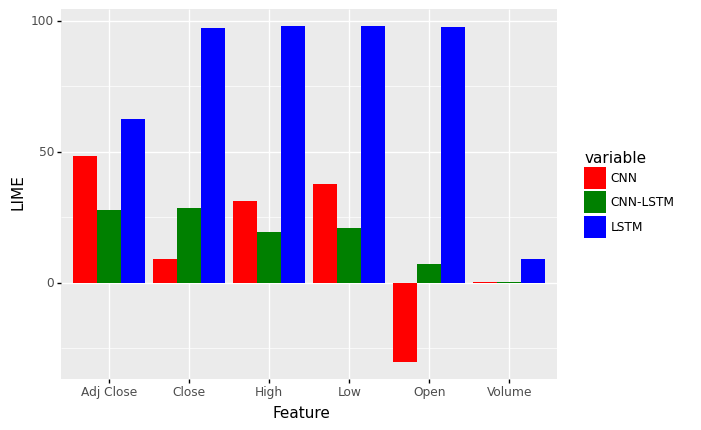

<ggplot: (147585714673)>

In [65]:
grpcol = ["red", "green", "blue"]
g = (
    ggplot(res_feat, aes(x="index", y="value", fill="variable")) +
    geom_bar(stat="identity", position=position_dodge()) +
    labs(y="LIME", x="Feature") +
    scale_fill_manual(values=grpcol)
)
ggsave(plot=g, filename='fig3.png', dpi=80)
g

In [66]:
res_lags = pd.DataFrame(columns=[i for i in range(15)])
for el in [lstm_lime_lags[:15][::-1], cnn_lags[:15][::-1], cnn_lstm_lags[:15][::-1]]:
    res_lags = res_lags.append({i: el[i] for key, i in zip(res_lags, range(len(res_lags.columns)))}, ignore_index=True)
res_lags = res_lags.T
res_lags.rename(columns={0: "LSTM", 1: "CNN", 2: "CNN-LSTM"}, inplace=True)
for col in ["LSTM", "CNN", "CNN-LSTM"]:
    res_lags[col] = res_lags[col] #/ res_lags[col].std()
print(res_lags)
res_lags = res_lags.reset_index()
res_lags = res_lags.melt(id_vars="index")

         LSTM        CNN    CNN-LSTM
0   42.102425  13.558718  185.751190
1   34.751663  10.462200   64.139503
2   30.700209   7.650828   23.593761
3   26.071745   5.462123    1.962947
4   21.509335   6.865375   -2.682193
5   17.669977   3.871144   -7.647363
6   13.937444   2.351737   -9.463132
7   12.448064   2.649004   -6.343948
8   11.063379   2.483214   -0.213388
9    9.915688   1.125763    3.442972
10   9.832331   4.544173    4.888129
11   9.769526   7.156552    0.778096
12   9.687968   6.888227    0.725406
13   9.626748   2.069221    0.128499
14   9.563993  -0.077227    0.085276


In [67]:
lstm_lime_lags

array([  9.5639925,   9.626748 ,   9.687968 ,   9.7695265,   9.832331 ,
         9.915688 ,  11.063379 ,  12.448064 ,  13.937444 ,  17.669977 ,
        21.509335 ,  26.071745 ,  30.700209 ,  34.751663 ,  42.102425 ,
        51.21498  ,  60.765926 ,  71.73648  ,  84.05928  ,  98.35228  ,
       112.69204  , 129.70264  , 147.30067  , 163.44888  , 177.96252  ,
       187.07443  , 188.659    , 190.01666  , 190.37062  , 190.37062  ],
      dtype=float32)

In [68]:
res_lags.groupby("variable").std()

,index,value
variable,,
CNN,4.472136,3.698209
CNN-LSTM,4.472136,49.952277
LSTM,4.472136,10.710197


Saving 6.4 x 4.8 in image.
Filename: fig4.png
Confidence intervals are not yet implementedfor lowess smoothings.
Confidence intervals are not yet implementedfor lowess smoothings.


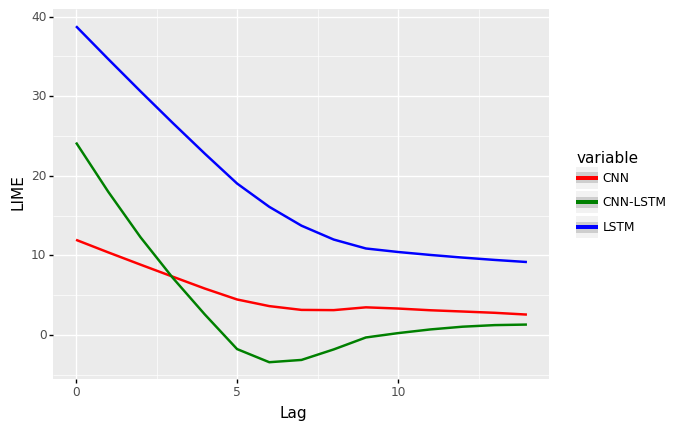

<ggplot: (147585745276)>

In [69]:
grpcol = ["red", "green", "blue"]
g = (
    ggplot(res_lags, aes(x="index", y="value", color="variable"))
    + geom_smooth()
    + scale_color_manual(values=grpcol)
    + labs(x="Lag", y="LIME")
)
ggsave(plot=g, filename='fig4.png', dpi=80)
g

In [70]:
test_rep = list(stk_train["Open"])
tvs = []
for j in range(15):
    tv = []
    for i in range(j, len(test_rep)):
        tv.append(test_rep[i] - test_rep[i-j])
    tv = np.array(tv)
    print(f"{j}: {sum(tv)}")
    tvs.append(sum(tv))

0: 0.0
1: 21.416069
2: 43.45856799999997
3: 64.79785300000005
4: 86.44928199999998
5: 108.28856699999977
6: 130.06356900000014
7: 152.5460689999999
8: 175.3185699999999
9: 197.68857100000002
10: 221.37106999999986
11: 245.97106999999954
12: 269.461072
13: 292.99607400000053
14: 316.8510759999996


## Residuals

### CNN

In [71]:
from a2d_cnn import cnn_build

WINDOW_SIZE = 18
model = cnn_build(WINDOW_SIZE)
model.load_weights('checkpoint/cnn_rez_AAPL_checkpoint/')

import numpy as np
import visualization.view_time_series as vts
from sklearn.preprocessing import StandardScaler
stk_train = vts.stock_get("AAPL_residuals", "2014-06-01", "2019-06-01")
stk_test = vts.stock_get("AAPL_residuals", "2019-06-01", "2020-06-01")

apple_train = stk_train.iloc[:,1:7].values
num_instances, num_features = stk_train.shape
apple_test = stk_test.iloc[:, 1:7].values

feature_set = []
labels = []
test_feature_set = []
test_labels = []

scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(-1,1))

apple_train_scaled = scaler.fit_transform(apple_train)
print(apple_train_scaled)
apple_test_scaled = scaler.transform(apple_test)

for i in range(WINDOW_SIZE, apple_train_scaled.shape[0]):
    feature_set.append(apple_train_scaled[i-WINDOW_SIZE:i, :])
    labels.append(apple_train_scaled[i,0])
for i in range(WINDOW_SIZE, apple_test_scaled.shape[0]):
    test_feature_set.append(apple_test_scaled[i-WINDOW_SIZE:i, :])
    test_labels.append(apple_test_scaled[i,0])

feature_set, labels = np.array(feature_set), np.array(labels)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], feature_set.shape[2], 1))
    
test_feature_set, test_labels = np.array(test_feature_set), np.array(test_labels)
test_feature_set = np.reshape(test_feature_set, (test_feature_set.shape[0], \
                                                            test_feature_set.shape[1], feature_set.shape[2], 1))

[[-0.22945724 -0.79200888 -0.45288655 -0.29675078 -0.28676564 -1.37851679]
 [-0.41752729  0.37921694  0.40503627  0.53386549  0.49863561 -0.82486279]
 [ 0.52495142  0.57646036  0.41700401  0.41362534  0.38624276  0.69216119]
 ...
 [-1.15899059 -0.51810645 -0.82961539 -0.42072251 -0.43786795 -0.05123333]
 [ 0.54108656 -0.04649368  0.35013129  0.39607715  0.40769196 -0.57666506]
 [-0.6924126  -0.67618541 -0.86635351 -1.46959356 -1.51804864  0.13673633]]


In [72]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular
# get the different explanations

methods_params = [
    ("LIME", Lime, {})
]

explanations = []

qc_reshape = test_feature_set.reshape((233,18*6))

def predict(qc):
    global model
    return model.predict(qc.reshape((qc.shape[0], 18, 6, 1)))
for name, Cls, params in methods_params:
    
    explainer   = Cls(predict, **params)
    explanation = explainer(qc_reshape, test_labels)

    explanations.append((name, explanation))

In [73]:
lime_cnn =np.array(explanations[0][1]).reshape(test_feature_set.shape)
print(lime_cnn.shape)
cnn_features = salience_cnn.mean(axis=(0,1))
cnn_lags = salience_cnn.mean(axis=(0,2))
print(cnn_features)
print(cnn_lags)

(233, 18, 6, 1)
[7.323893  7.8824615 7.1345367 6.680096  7.7771873 1.9300284]
[ 0.67576665  1.3269963   1.7454101   2.2217782   1.9820212   1.9726758
  2.5307043   2.9020813   3.419928    3.960779    4.0794497   4.1854362
  7.2924905   8.232275   14.624146   14.766368   21.987574   18.278772  ]


### LSTM

In [74]:
from a2d_lstm import lstm_build
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import visualization.view_time_series as vts
import numpy as np

WINDOW_SIZE = 30

stk_train = vts.stock_get("AAPL_residuals", "2014-06-01", "2019-06-01")
stk_test = vts.stock_get("AAPL_residuals", "2019-06-01", "2020-06-01")

stk_train = stk_train.iloc[:,1:7].values
num_instances, num_features = stk_train.shape
stk_test = stk_test.iloc[:, 1:7].values

feature_set = []
labels = []
test_feature_set = []
test_labels = []

            #scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1,1))

stk_train_scaled = scaler.fit_transform(stk_train)
print(stk_train_scaled)
stk_test_scaled = scaler.transform(stk_test)

for i in range(WINDOW_SIZE, stk_train_scaled.shape[0]):
    feature_set.append(stk_train_scaled[i-WINDOW_SIZE:i, :])
    labels.append(stk_train_scaled[i,0])
for i in range(WINDOW_SIZE, stk_test_scaled.shape[0]):
    test_feature_set.append(stk_test_scaled[i-WINDOW_SIZE:i, :])
    test_labels.append(stk_test_scaled[i,0])

feature_set, labels = np.array(feature_set), np.array(labels)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], feature_set.shape[2]))
print(feature_set.shape)

test_feature_set, test_labels = np.array(test_feature_set), np.array(test_labels)
test_feature_set = np.reshape(test_feature_set, (test_feature_set.shape[0], \
                                                            test_feature_set.shape[1], feature_set.shape[2]))

### Build model
model = lstm_build((feature_set.shape[1], feature_set.shape[2]))

model.load_weights('checkpoint/lstm_rez_AAPL_checkpoint/')

[[-0.01823789 -0.08933391 -0.07591487  0.12313678  0.12971938 -0.72295819]
 [-0.0463366   0.08883762  0.06553692  0.26388975  0.26047503 -0.63809392]
 [ 0.09447497  0.11884307  0.06751013  0.24351432  0.24176357 -0.40556398]
 ...
 [-0.15711535 -0.04766678 -0.13802881  0.10212901  0.10456347 -0.51951174]
 [ 0.09688565  0.02407682  0.05648435  0.24054068  0.24533449 -0.60005009]
 [-0.087406   -0.07171438 -0.14408608 -0.07560855 -0.07526783 -0.49069969]]
(1229, 30, 6)


In [75]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular
# get the different explanations
explanations = []

methods_params = [
    ("LIME", Lime, {})
]

for name, Cls, params in methods_params:
    
    explainer   = Cls(model, **params)
    explanation = explainer(test_feature_set, test_labels)

    explanations.append((name, explanation))

In [76]:
lime_lstm =np.array(explanations[0][1])
lstm_lime_features = lime_lstm.mean(axis=(0,1))
print(lstm_lime_features)
lstm_lime_lags = lime_lstm.mean(axis=(0,2))
print(lstm_lime_lags)

[3.499913  3.499913  3.5243142 3.6426992 3.6187909 2.743404 ]
[ 0.26151356  0.26176247  0.26548076  0.27379927  0.20670359  0.21383388
  0.37665895  0.4638338   0.5941932   1.6500003   2.6927693   1.9899379
  1.0048723   1.3172133   1.8065195   2.270005    2.4520454   2.6353047
  2.9187891   3.1702397   3.5042484   4.4964533   4.8823957   6.5651717
  7.4510093   9.081875    9.561682    9.795822    9.861508   10.620029  ]


### CNN-LSTM

In [77]:
from cnn_lstm import cnn_lstm_build
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import visualization.view_time_series as vts
import numpy as np

WINDOW_SIZE = 15

stk_train = vts.stock_get("AAPL_residuals", "2014-06-01", "2019-06-01")
stk_test = vts.stock_get("AAPL_residuals", "2019-06-01", "2020-06-01")

AAPL = stk_train
AAPL_test = stk_test
print(AAPL_test.info())

apple_train = AAPL.iloc[:,1:7].values
num_instances, num_features = AAPL.shape
apple_test = AAPL_test.iloc[:, 1:7].values

scaler = StandardScaler()

apple_train_scaled = scaler.fit_transform(apple_train)
apple_test_scaled = scaler.transform(apple_test)

feature_set = []
labels = []
test_feature_set = []
test_labels = []

for i in range(WINDOW_SIZE, apple_train_scaled.shape[0]):
    feature_set.append(apple_train_scaled[i-WINDOW_SIZE:i, :])
    labels.append(apple_train_scaled[i,0])
for i in range(WINDOW_SIZE, apple_test_scaled.shape[0]):
    test_feature_set.append(apple_test_scaled[i-WINDOW_SIZE:i, :])
    test_labels.append(apple_test_scaled[i,0])

feature_set, labels = np.array(feature_set), np.array(labels)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], feature_set.shape[2]))

test_feature_set, test_labels = np.array(test_feature_set), np.array(test_labels)
test_feature_set = np.reshape(test_feature_set, (test_feature_set.shape[0], \
                                                        test_feature_set.shape[1], feature_set.shape[2]))
print(feature_set.shape)
print(test_feature_set.shape)

n_steps, n_length = 1, WINDOW_SIZE
n_features = feature_set.shape[2]
X_train = feature_set.reshape((feature_set.shape[0], n_steps, n_length, n_features))
X_test = test_feature_set.reshape((test_feature_set.shape[0], n_steps, n_length, n_features))
print(X_train.shape)
print(X_test.shape)

model = cnn_lstm_build(n_length,n_features)

model.load_weights('checkpoint/cnn_lstm_rez_AAPL_checkpoint/')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 2368 to 2618
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.7 KB
None
(1244, 15, 6)
(236, 15, 6)
(1244, 1, 15, 6)
(236, 1, 15, 6)


In [78]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular
# get the different explanations

qc_reshape = test_feature_set.reshape((236,15*6))

methods_params = [
    ("LIME", Lime, {})
]

explanations = []

def predict(qc):
    global model
    return model.predict(qc.reshape((qc.shape[0], 1, 15, 6)))
for name, Cls, params in methods_params:
    
    explainer   = Cls(predict, **params)
    explanation = explainer(qc_reshape, test_labels)

    explanations.append((name, explanation))

In [79]:
lime_cnn_lstm = np.array(explanations[0][1]).reshape(X_test.shape)
cnn_lstm_features = lime_cnn_lstm.mean(axis=(0,1,2))
print(cnn_lstm_features)
cnn_lstm_lags = lime_cnn_lstm.mean(axis=(0,1,3))
print(cnn_lstm_lags)

[ 2.4889731  -1.5741092  -0.85818493  9.268715    7.454721   -0.34356073]
[ 0.24088967  0.46718925 -1.9845874  -1.9708151   0.25492653  1.121502
  3.8938522  -0.9894792  -1.1769881  -2.3998508  -0.24794097 -2.5074883
  0.42796925 -2.8447506  48.806995  ]


### Comparison

In [80]:
res_feat = pd.DataFrame(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
for el in [lstm_features, cnn_features, cnn_lstm_features]:
    res_feat = res_feat.append({key: el[i] for key, i in zip(res_feat, range(len(res_feat.columns)))}, ignore_index=True)
res_feat = res_feat.T
res_feat.rename(columns={0: "LSTM", 1: "CNN", 2: "CNN-LSTM"}, inplace=True)
for col in ["LSTM", "CNN", "CNN-LSTM"]:
    res_feat[col] = res_feat[col] / res_feat[col].std()
print(res_feat)
res_feat = res_feat.reset_index()
res_feat = res_feat.melt(id_vars="index")

               LSTM       CNN  CNN-LSTM
Open       2.695268  3.241257  0.540615
High       2.704909  3.488456 -0.341903
Low        2.704909  3.157455 -0.186401
Close      2.680539  2.956338  2.013202
Adj Close  1.727306  3.441866  1.619195
Volume     0.244726  0.854152 -0.074623


Saving 6.4 x 4.8 in image.
Filename: fig5.png


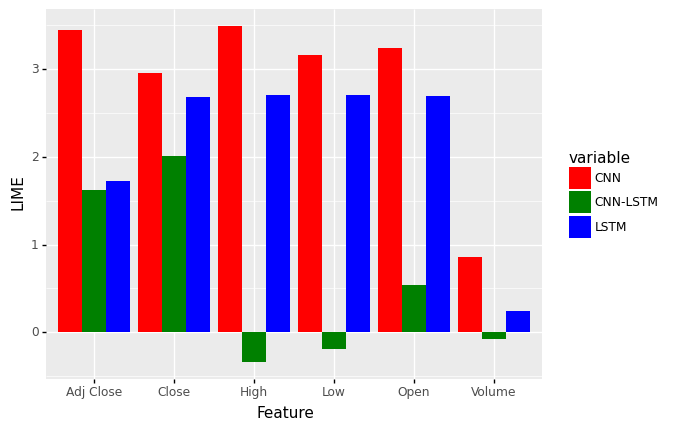

<ggplot: (147590740773)>

In [81]:
grpcol = ["red", "green", "blue"]
g = (
    ggplot(res_feat, aes(x="index", y="value", fill="variable")) +
    geom_bar(stat="identity", position=position_dodge())
    + scale_fill_manual(values=grpcol)
    + labs(x="Feature", y="LIME")
)
ggsave(plot=g, filename='fig5.png', dpi=80)
g

In [82]:
res_lags = pd.DataFrame(columns=[i for i in range(15)])
for el in [lstm_lags[:18][::-1], cnn_lags[:18][::-1], cnn_lstm_lags[:18][::-1]]:
    res_lags = res_lags.append({i: el[i] for key, i in zip(res_lags, range(len(res_lags.columns)))}, ignore_index=True)
res_lags = res_lags.T
res_lags.rename(columns={0: "LSTM", 1: "CNN", 2: "CNN-LSTM"}, inplace=True)
for col in ["LSTM", "CNN", "CNN-LSTM"]:
    res_lags[col] = res_lags[col] #/ res_lags[col].std()
print(res_lags)
res_lags = res_lags.reset_index()
res_lags = res_lags.melt(id_vars="index")

         LSTM        CNN   CNN-LSTM
0   71.682014  18.278772  48.806995
1   60.625755  21.987574  -2.844751
2   51.092808  14.766368   0.427969
3   42.007061  14.624146  -2.507488
4   34.683350   8.232275  -0.247941
5   30.643724   7.292490  -2.399851
6   26.091434   4.185436  -1.176988
7   21.534874   4.079450  -0.989479
8   17.664331   3.960779   3.893852
9   13.907286   3.419928   1.121502
10  12.405680   2.902081   0.254927
11  10.956728   2.530704  -1.970815
12   9.797272   1.972676  -1.984587
13   9.817818   1.982021   0.467189
14   9.754713   2.221778   0.240890


Saving 6.4 x 4.8 in image.
Filename: fig6.png
Confidence intervals are not yet implementedfor lowess smoothings.
Confidence intervals are not yet implementedfor lowess smoothings.


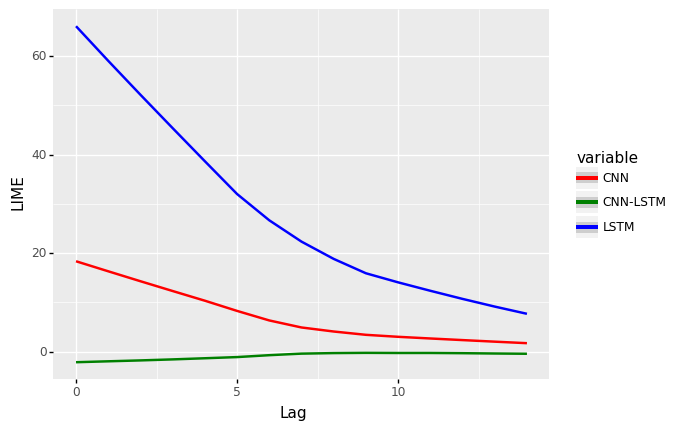

<ggplot: (147590798698)>

In [83]:
g = (
    ggplot(res_lags, aes(x="index", y="value", color="variable"))
    + geom_smooth()
    + scale_color_manual(values=grpcol)
    + labs(x="Lag", y="LIME")
)
ggsave(plot=g, filename='fig6.png', dpi=80)
g